In [1]:
#the chosen Dataset presents information on the structure of movie theatres in Austria, where the data is shared among the Bundesländer (or states). 
#RQs: a)For the purposes of the assignment, I wanted to compare the structure of the movie theatres (Kinosäle) amovng the Austrian states.
#     b) compare the number of sitplaces in the given movie theatres .
# This visualisation gives us,so to say, a picture of the development of entertainment in the sohere of cinema. Of course this information cannot be fully correct, 
#because we do not have any further data on the number of citizens, their age, etc.
#In order to do that, I have to upload the file into the notebook (.read_csv)
#Before uploading the file, I decided to import a few packages that will or could be useful

In [4]:
#tabula dataset, importing packages and the dataset
#csv, etc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import os
dataset = pd.read_csv('C:/Users/tanja/OneDrive/Documents/GitHub/Struktur der Kinos.csv')

In [5]:
!pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/27/b24c1610c7ae5716709321f04d38d7b8b71ed531f80df4f697b9ad99cfc3/fiona-1.9.5-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     ---------------- ----------------------- 20.5/51.1 kB ? eta -:--:--
     ---------------------- --------------- 30.7/51.1 kB 330.3 kB/s eta 0:00:01
     ------------------------------ ------- 41.0/51.1 kB 281.8 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 262.0 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64

In [7]:
dataset = pd.read_csv('C:/Users/tanja/OneDrive/Documents/GitHub/Struktur der Kinos.csv', sep = ";") #with the separation fuction I "cleaned" the dataset
#to make it readable 

In [8]:
dataset.head() #shows the first 5 rows of the dataset

,Bundesland,Kinos,Kinosäle,Sitzplätze,Sitzplätze pro Tausend der Bevölkerung,"Kinobesuche, in Tausend",Kinobesuche pro Tausend der Bevölkerung
0,Burgenland,5,20,2513,"8,4","165,1",555
1,Kärnten,8,34,6351,"11,2","279,9",496
2,Niederösterreich,26,98,13995,"8,2","777,3",457
3,Oberösterreich,25,94,13342,"8,9","938,4",623
4,Salzburg,9,29,4965,"8,8","345,4",614


In [9]:
dataset.tail() #shows the last 5 rows of the dataset

,Bundesland,Kinos,Kinosäle,Sitzplätze,Sitzplätze pro Tausend der Bevölkerung,"Kinobesuche, in Tausend",Kinobesuche pro Tausend der Bevölkerung
5,Steiermark,19,80,12641,"10,1","706,2",564
6,Tirol,11,46,7373,"9,6","451,8",591
7,Vorarlberg,8,26,4347,"10,8","255,2",635
8,Wien,27,138,24734,"12,8","1375,6",712
9,Österreich,138,565,90261,"10,1","5294,9",590


In [10]:
dataset.info() #explore, types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Bundesland                               10 non-null     object
 1   Kinos                                    10 non-null     int64 
 2   Kinosäle                                 10 non-null     int64 
 3   Sitzplätze                               10 non-null     int64 
 4   Sitzplätze pro Tausend der Bevölkerung   10 non-null     object
 5   Kinobesuche, in Tausend                  10 non-null     object
 6   Kinobesuche pro Tausend der Bevölkerung  10 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes


In [11]:
print(dataset)

         Bundesland  Kinos  Kinosäle  Sitzplätze  \
0        Burgenland      5        20        2513   
1           Kärnten      8        34        6351   
2  Niederösterreich     26        98       13995   
3    Oberösterreich     25        94       13342   
4          Salzburg      9        29        4965   
5        Steiermark     19        80       12641   
6             Tirol     11        46        7373   
7        Vorarlberg      8        26        4347   
8              Wien     27       138       24734   
9        Österreich    138       565       90261   

  Sitzplätze pro Tausend der Bevölkerung Kinobesuche, in Tausend  \
0                                    8,4                   165,1   
1                                   11,2                   279,9   
2                                    8,2                   777,3   
3                                    8,9                   938,4   
4                                    8,8                   345,4   
5                  

In [21]:
dataset.describe()

,Kinos,Kinosäle,Sitzplätze,Kinobesuche pro Tausend der Bevölkerung
count,10.00000,10.000000,10.000000,10.000000
mean,27.60000,113.000000,18052.200000,583.700000
std,39.68263,163.506031,26200.556889,71.959943
min,5.00000,20.000000,2513.000000,457.000000
25%,8.25000,30.250000,5311.500000,557.250000
50%,15.00000,63.000000,10007.000000,590.500000
75%,25.75000,97.000000,13831.750000,620.750000
max,138.00000,565.000000,90261.000000,712.000000


C:\Users\tanja\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


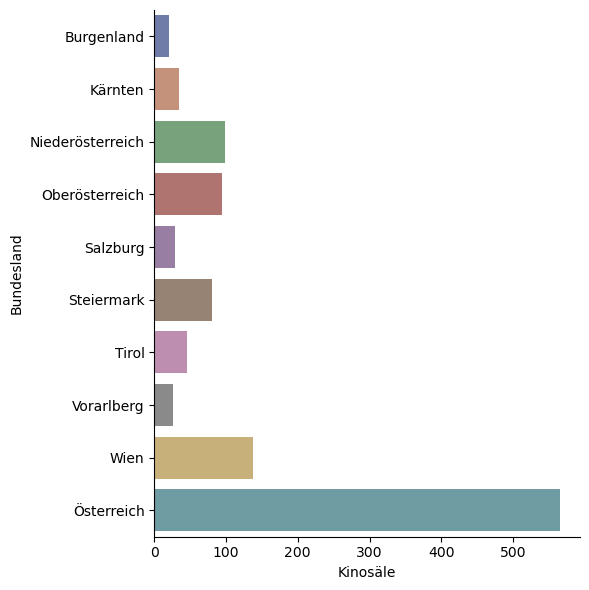

In [31]:
#visualisation of the halls in the movie thetres in each state of Austria and the whole country for comparison. 
#we can see difference better due to the illustration using bar chart (+ the total in the whole country)
g = sns.catplot(
    data=dataset, kind="bar",
    x="Kinosäle", y="Bundesland", palette="dark", alpha=.6, height=6
)

C:\Users\tanja\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


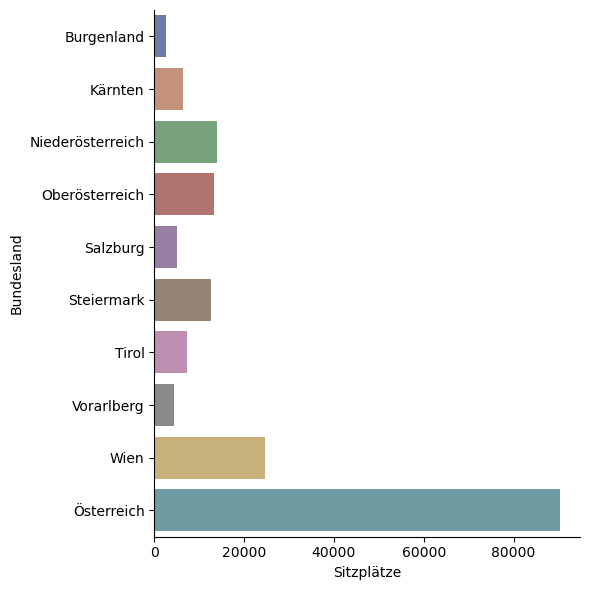

In [32]:
#now we can compare the number of seats in the movie theatres in every state and see the total in the whole country
g = sns.catplot(
    data=dataset, kind="bar",
    x="Sitzplätze", y="Bundesland", palette="dark", alpha=.6, height=6
)